### Inne popularne metody ramek

#### Metoda info

Metoda `info` dostarcza podstawowych informacji o ramce danych, w tym liczby nie-nullowych wartości, typów danych oraz pamięci używanej przez ramkę.

In [1]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, None],
    'B': ['foo', 'bar', 'baz']
})
df

,A,B
0,1.0,foo
1,2.0,bar
2,NaN,baz


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       2 non-null      float64
 1   B       3 non-null      object 
dtypes: float64(1), object(1)
memory usage: 180.0+ bytes


#### Metoda describe

Metoda `describe` generuje statystyki opisowe dla kolumn liczbowych (lub kategorycznych, jeśli podano argument). Zawiera takie statystyki jak średnia, odchylenie standardowe, minimum i maksimum.

In [3]:
df.describe()

,A
count,2.000000
mean,1.500000
std,0.707107
min,1.000000
25%,1.250000
50%,1.500000
75%,1.750000
max,2.000000


#### Metoda value_counts

Metoda `value_counts` zwraca liczbę wystąpień unikalnych wartości w danej kolumnie/kolumnach. Jest przydatna do analizy kategorycznych danych.

In [4]:
df.value_counts()

A    B  
1.0  foo    1
2.0  bar    1
Name: count, dtype: int64

In [5]:
df['A'].value_counts()

A
1.0    1
2.0    1
Name: count, dtype: int64

In [6]:
df['B'].value_counts()

B
foo    1
bar    1
baz    1
Name: count, dtype: int64

#### Sortowanie

Ramki można sortować za pomocą metody sort_values(). Można sortować według jednej lub wielu kolumn.

In [7]:
df_sorted = df.sort_values(by='A', ascending=False)
df_sorted

,A,B
1,2.0,bar
0,1.0,foo
2,NaN,baz


#### replace/map

Metoda `replace` pozwala na zamianę określonych wartości w ramce danych, natomiast `map` jest używana do stosowania funkcji lub zamiany wartości na podstawie słownika.

In [8]:
df['B'] = df['B'].replace({'foo': 'qux'})
df

,A,B
0,1.0,qux
1,2.0,bar
2,NaN,baz


In [9]:
df['A'] = df['A'].map({1: 'one', 2: 'two'})
df

,A,B
0,one,qux
1,two,bar
2,NaN,baz


#### fillna

Metoda `fillna` służy do wypełniania brakujących wartości (NaN) w ramce danych. Możesz wypełniać wartości stałymi lub metodami, takimi jak "ffill" (forward fill).

In [10]:
df['A'] = df['A'].fillna(0)
df

,A,B
0,one,qux
1,two,bar
2,0,baz


#### crosstab

Funkcja `crosstab` służy do tworzenia tabel krzyżowych, które pokazują częstość wystąpień kombinacji dwóch lub więcej zmiennych. Tablice krzyżowe pozwalają na badanie relacji między dwiema lub więcej zmiennymi kategorycznymi. Umożliwiają one zrozumienie, jak różne kategorie wpływają na siebie.

Załóżmy, że mamy dane dotyczące ankiety wśród studentów na temat ich preferecji dotyczących kierunku studiów oraz płci.

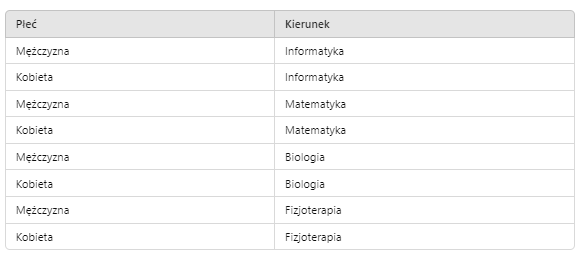

In [11]:
# Przykładowe dane
data = {
    'Płeć': ['Mężczyzna', 'Kobieta', 'Mężczyzna', 'Kobieta', 
             'Mężczyzna', 'Kobieta', 'Mężczyzna', 'Kobieta'],
    'Kierunek': ['Informatyka', 'Informatyka', 'Matematyka', 
                 'Matematyka', 'Biologia', 'Biologia', 
                 'Fizjoterapia', 'Fizjoterapia']
}

df = pd.DataFrame(data)
df

,Płeć,Kierunek
0,Mężczyzna,Informatyka
1,Kobieta,Informatyka
2,Mężczyzna,Matematyka
3,Kobieta,Matematyka
4,Mężczyzna,Biologia
5,Kobieta,Biologia
6,Mężczyzna,Fizjoterapia
7,Kobieta,Fizjoterapia


In [12]:
# Tworzenie tabeli krzyżowej
crosstab = pd.crosstab(df['Płeć'], df['Kierunek'])
crosstab

Kierunek,Biologia,Fizjoterapia,Informatyka,Matematyka
Płeć,,,,
Kobieta,1,1,1,1
Mężczyzna,1,1,1,1


Wniosek:

Kobiety: 1 wybiera Biologię, 1 Fizjoterapię, 1 Informatykę, 1 Matematyka.

Mężczyźni: 1 wybiera Biologię, 1 Fizjoterapię, 2 Informatykę, 1 Matematyka.

#### cut

Funkcja `cut` pozwala na "binowanie" danych ciągłych w przedziały. Jest to przydatne, gdy chcesz grupować dane w kategorie.

In [13]:
# Przykładowe dane z wartościami liczbowymi
data = {'A': [0.5, 1.5, 2.0, 2.5, 3.0]}
df = pd.DataFrame(data)

# Użycie cut() do binowania danych
df['A_bins'] = pd.cut(df['A'], bins=[0, 1, 2, 3], labels=['low', 'medium', 'high'])

df

,A,A_bins
0,0.5,low
1,1.5,medium
2,2.0,medium
3,2.5,high
4,3.0,high
